In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터를 로드
digits=datasets.load_digits()

# 특성 행렬을 표준화 처리
features=StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체
pca=PCA(n_components=0.99)

# PCA를 수행
features_pca=pca.fit_transform(features)

# 결과 확인
print("원본 특성 개수 :",features.shape[1])
print("줄어든 특성 개수 :",features_pca.shape[1])

원본 특성 개수 : 64
줄어든 특성 개수 : 54


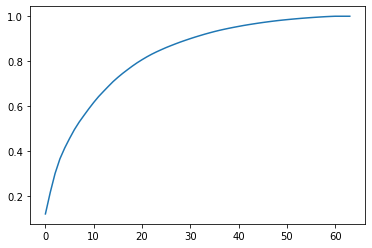

In [4]:
import matplotlib.pyplot as plt
import numpy as np

pca=PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
# 대략 30개의 주성분으로 80% 이상을 표현할 수 있음

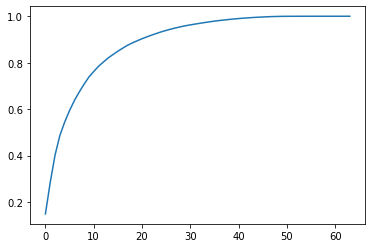

In [6]:
# 정확하게 분산을 계산하기 위해서는 표준화하지 않은 원본 데이터를 사용하는 것이 좋음
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [7]:
# 클래스 분리를 최대화함으로써 특성을 줄이기
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드
iris=datasets.load_iris()
features=iris.data
target=iris.target

# PCA는 데이터에서 분산이 최대인 성분의 축에 관심이 있는 알고리즘
# LDA는 클래스 간의 차이를 최대화하는 축에 관심이 있는 알고리즘
# LDA 객체를 만들고 실행하여 특성을 변환
# 클래스 간의 판별이 최대인 축
lda=LinearDiscriminantAnalysis(n_components=1)
features_lda=lda.fit(features, target).transform(features)

# 특성 개수를 출력
print("원본 특성 개수 :",features.shape[1])
print("줄어든 특성 개수 :",features_lda.shape[1])
print(features_lda.shape)

원본 특성 개수 : 4
줄어든 특성 개수 : 1
(150, 1)


In [8]:
# 각 성분이 설명하는 분산의 양
# 여기서는 하나의 성분이 99%를 설명하고 있으므로 LinearDiscriminantAnalysis(n_components=1)로 설정함
lda.explained_variance_ratio_

array([0.9912126])

In [9]:
# 행렬 분해를 사용하여 특성을 줄이기
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드
digits=datasets.load_digits()

# 특성 행렬을 로드
features=digits.data

# NMF를 만들고 학습 적용
nmf=NMF(n_components=10, random_state=1)
features_nmf=nmf.fit_transform(features)

# 결과를 출력
print("원본 특성 개수 :",features.shape[1])
print("줄어든 특성 개수 :",features_nmf.shape[1])

D:\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


원본 특성 개수 : 64
줄어든 특성 개수 : 10


D:\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [10]:
# 희소한 데이터의 특성을 줄이기
# TSVD : pca와 비슷하지만 pca와 달리 희소 행렬에도 사용할 수 있는 방법
# 텍스트마이닝에서는 LSA(latent semantic analysis, 잠재의미분석)이라고도 함

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from scipy.sparse import csr_matrix
import numpy as np

# 데이터를 로드
digits=datasets.load_digits()

# 특성 행렬을 표준화 처리
features=StandardScaler().fit_transform(digits.data)

# 희소 행렬
features_sparse=csr_matrix(features)

# TSVD 객체
tsvd=TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용
features_sparse_tsvd=tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력
print("원본 특성 개수 :",features_sparse.shape[1])
print("줄어든 특성 개수 :",features_sparse_tsvd.shape[1])

원본 특성 개수 : 64
줄어든 특성 개수 : 10


In [11]:
# 처음 세 개의 성분이 30%를 설명함
tsvd.explained_variance_ratio_[0:3].sum()

0.30039385390732304